# Applying RNN

# 1)- Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re    # for regular expressions 
import string 
import requests
import pickle
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# for text analysis and model
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\69785hsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using TensorFlow backend.


In [5]:
# For Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from keras.utils import np_utils

# 2)- Laod data

pickle file from previous notebook i.e Create data

In [6]:
df = pd.read_pickle('text_classify_clean.pkl')
df.head()

,keywds,num_keywds,label,num_label,appln_title,cleaned
0,Augmented Reality,1,ET,2,Method and apparatus for flame spraying refrac...,method apparatus flame spraying refactory mate...
1,Virtual Assistants,1,ET,2,Anti-dazzle system for automobile headlights,source vehicle polarising screens 1 placed fro...
2,Augmented Reality,1,ET,2,"Amidoimidobisphenoles, their preparation and t...",amidoimidobisphenols formula image ar pphenyle...
3,Augmented Reality,1,ET,2,BISMALEIMIDE RESINS CONTAINING LESS THAN 0.1 W...,invention concerns bismaleimide resins based a...
4,Augmented Reality,1,ET,2,"New benzazepine derivatives, medicaments conta...",benzofuro 3a 3 2 ef 2 benzazepines ringopened ...


In [7]:
df.shape

(283212, 6)

### Splitting

In [8]:
Y=df['label']
X=df['cleaned']

In [9]:
print(X.shape)
print(Y.shape)

(283212,)
(283212,)


# 3) Pre-processing for modeling

### 3.1)- Convert words to matrix
We need to convert words into matrices. One way is shown through sklearn. Other way is given. We can always match the two

**i-I started by fitting a tokenizer on my document**

In [10]:
# Fitting
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(X)

**ii- I wanted to check if my data is fitted correctly so I converted into sequence**

In [11]:
# convert to sequence
X_token = tokenizer.texts_to_sequences(X)

In [12]:
pd.DataFrame(X_token).head()

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,2.0,88.0,1838.0,1835.0,32.0,285.0,754.0,29.0,653.0,504.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,116.0,87.0,15.0,865.0,455.0,93.0,1480.0,781.0,51.0,246.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27.0,7.0,17.0,575.0,1321.0,52.0,1321.0,391.0,308.0,1538.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,23.0,166.0,71.0,149.0,460.0,1582.0,1139.0,912.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51.0,22.0,22.0,117.0,310.0,618.0,486.0,501.0,703.0,346.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:

df['cleaned'][0]

'method apparatus flame spraying refactory material situ repair eg furnace linings wherein inert carrier gas incapable supporting combustion particles refactory oxide combustible metal oxidizable material ar'

In [14]:
df['cleaned'][4]

'benzofuro 3a 3 2 ef 2 benzazepines ringopened form ii diazabicycloalkanes iii well enantiomers addition salts new z n n+ r6 r7 present r7 r1 r2 h f cl br cn nc oh sh no2 so3h nh2 nh2 cf3 16c sic optionally substituted ar alkyl ar alkoxy nh2 optionally mono disubstituted 16c ar alkyl ar alkylcarbonyl ar alkoxycarbonyl cooh coo ar alkyl conh con ar alkyl ch2 nq n 13 q cl br oh cooh cn nc r1+r2 chchchch ch2 r3 r1 especially oh ome r2+r3 ch2 r4 r5 either h alternatively combination h ar alkyl ar alkenyl ar alkynyl following sr8 sor8 so2r8 oh optionally protecting group eg tms tbdms ocsnr8 oconr9 ocor8 especially formula r4 r5 h may oh r4+r5 group formula nnhr10 nnr10r11 nor11 nnhc y1 q1 l ch2coobn ch2sme ph r8 h 110c optionally substituted ar alkyl r9 conhc h ph indicates optically active centre depicted alpha beta configurations r10 h 16c optionally substituted ar alkyl ar alkylcarbonyl ar alkylcarbonyloxy sulphonic acid group eg tosyl mesyl r11 r10 except ar alkylcarbonyloxy q1 y2 coor8

In [15]:
df['cleaned'][1]

'source vehicle polarising screens 1 placed front headlight 5 polarise beams plane 3 screen 2 fitted receiving vehicles vr windscreen 6 opt drivers spectacles pulldown visor plane polarisation approximately orthogonal wrt incident beams light 2 perceived driver 4 severely reduced intensity due scattering effects 3 light received indirectly little affected polarisation driver thus receives adequate visual information approaching vehicle counter dazzle overtaking vehicles rear screen rearview mirror may opt also polarising screens'

**pad_sequence:To keep all vectors of same length, I will use pad_sequence**

In [16]:
X_pd_sq = pad_sequences(X_token)

In [17]:
pd.DataFrame(X_pd_sq).head()

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,0,0,0,0,0,0,0,0,0,0,...,29,653,504,49,530,506,315,91,32,17
1,0,0,0,0,0,0,0,0,0,0,...,6,87,1606,1231,896,246,994,35,1738,86
2,0,0,0,0,0,0,0,0,0,0,...,158,1171,9,272,163,127,131,214,1382,166
3,0,0,0,0,0,0,0,0,0,0,...,196,1321,52,16,185,76,575,248,52,16
4,0,0,0,0,0,0,0,0,0,0,...,16,437,501,194,196,57,1585,238,132,461


In [18]:
X_pd_sq.shape

(283212, 979)

### All in one step

In [ ]:
#max_fatures = 2000
#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
#tokenizer.fit_on_texts(X)
#X = tokenizer.texts_to_sequences(X)
#X = pad_sequences(X)

### 3.2)-Train-test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pd_sq, Y, random_state=2019)

In [20]:
X_train.shape, X_test.shape

((212409, 979), (70803, 979))

In [21]:
print(y_train.shape)
print(y_test.shape)

(212409,)
(70803,)


### 3.3)-Encoding y-labeled feature

In [22]:
# keras needs inputs to be vectors , so one hot encoding values
from keras.utils import np_utils
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)

In [23]:
y_train[:5]

147581     ET
257498    NET
53516     NET
246151     ET
16850      ET
Name: label, dtype: object

In [24]:
y_train_ohe[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

- 0,1,0 is ET
- 0,0,1 is NET
- 1,0,0 is CET

In [31]:
unique_y_labels = list(y_train.value_counts().index)
unique_y_labels

['ET', 'NET', 'CET']

In [32]:
len(unique_y_labels)

3

In [33]:
X_train.shape[1]

979

# 4)- Build LSTM model

In [35]:
embed_dim = 128
lstm_out = 196
max_fatures = 2000
size_of_each_vect=X_train.shape[1]
uniq_y_label=len(unique_y_labels)

In [36]:
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = size_of_each_vect))
# X.shape[1] refers to 23 columns 
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(uniq_y_label,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 979, 128)          256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 979, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


### 4.1)-Train model

In [37]:
batch_size = 32
epochs = 20

In [38]:
from keras.callbacks import EarlyStopping

In [39]:
history = model.fit(X_train, y_train_ohe, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Use tf.cast instead.
Train on 191168 samples, validate on 21241 samples
Epoch 1/20
191168/191168 [==============================] - 5875s 31ms/step - loss: 0.1709 - acc: 0.9309 - val_loss: 0.0967 - val_acc: 0.9595
Epoch 2/20
191168/191168 [==============================] - 5553s 29ms/step - loss: 0.0929 - acc: 0.9614 - val_loss: 0.0835 - val_acc: 0.9675
Epoch 3/20
191168/191168 [==============================] - 5577s 29ms/step - loss: 0.0801 - acc: 0.9669 - val_loss: 0.0777 - val_acc: 0.9690
Epoch 4/20
191168/191168 [==============================] - 5637s 29ms/step - loss: 0.0722 - acc: 0.9699 - val_loss: 0.0787 - val_acc: 0.9686
Epoch 5/20
191168/191168 [==============================] - 5703s 30ms/step - loss: 0.0671 - acc: 0.9721 - val_loss: 0.0752 - val_acc: 0.9697
Epoch 6/20
191168/191168 [==============================] - 5749s 30ms/step - loss: 0.0627 - acc: 0.9737 - val_loss: 0.0755 - val_acc: 0.9707
Epoch 7/20
191168/191168 [=======================

# 5) Evaluate

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred[:5]

array([[1.31193106e-03, 9.98389244e-01, 2.98810191e-04],
       [2.86681403e-04, 9.99709904e-01, 3.39025723e-06],
       [1.09270383e-02, 9.88953829e-01, 1.19207456e-04],
       [2.80342269e-04, 9.99011874e-01, 7.07702828e-04],
       [1.28011152e-06, 2.71332974e-04, 9.99727428e-01]], dtype=float32)

**These are probabilities of output**

In [42]:
y_test_ohe[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

**Converting prob. into crisp classes i.e in 1D.**

In [43]:
## predict crisp classes for test set. Output will be 1-D
y_test_class = np.argmax(y_test_ohe,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [44]:
y_test_class[:5]

array([1, 1, 1, 1, 2], dtype=int64)

### 5 a)-Classification Report

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61       452
           1       0.98      0.97      0.98     44011
           2       0.95      0.98      0.96     26340

   micro avg       0.97      0.97      0.97     70803
   macro avg       0.92      0.81      0.85     70803
weighted avg       0.97      0.97      0.97     70803



### 5 b)-Confusion Matrix

In [46]:
print(confusion_matrix(y_test_class,y_pred_class))

[[  216   227     9]
 [   43 42659  1309]
 [    0   561 25779]]


### 5 c)- Loss and Accuracy

In [47]:
# For training data
loss, accuracy = model.evaluate(X_train, y_train_ohe, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

Training Accuracy: 0.9802
Training Loss: 0.0442


In [48]:
# For test data
loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Testing Accuracy:  0.9696
Testing Loss:  0.0797


In [49]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

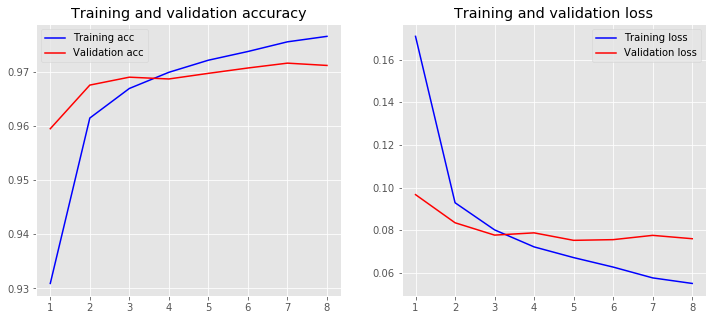

In [50]:
plot_history(history)